# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [321]:
import os

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [322]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기





### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [323]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv("C:/pandas_datasets/Pandas_Data/heart_failure_clinical_records_dataset.csv")

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [324]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [326]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [327]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


<Axes: xlabel='age', ylabel='Count'>

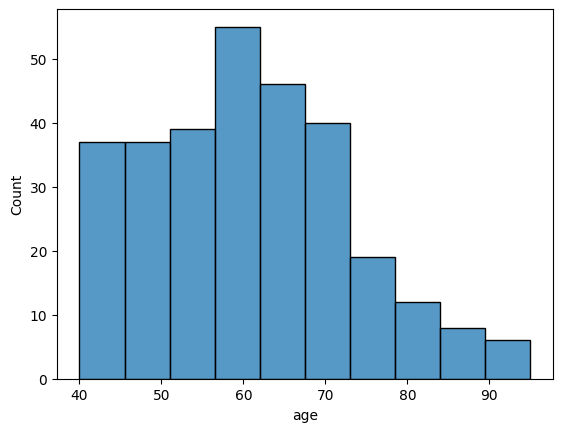

In [328]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기


sns.histplot(data=df, x='age')


<Axes: xlabel='age', ylabel='Count'>

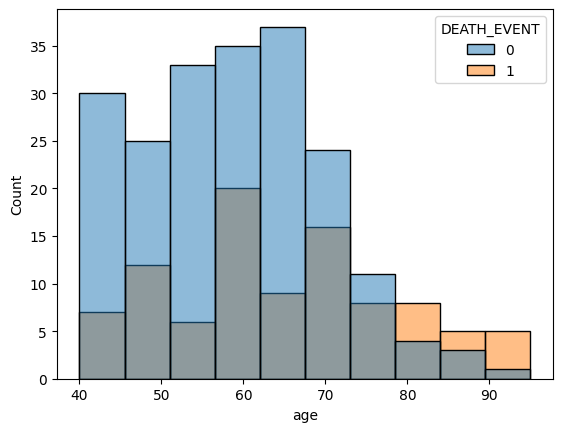

In [329]:
sns.histplot(data=df, x='age', hue='DEATH_EVENT')

<Axes: xlabel='age', ylabel='Count'>

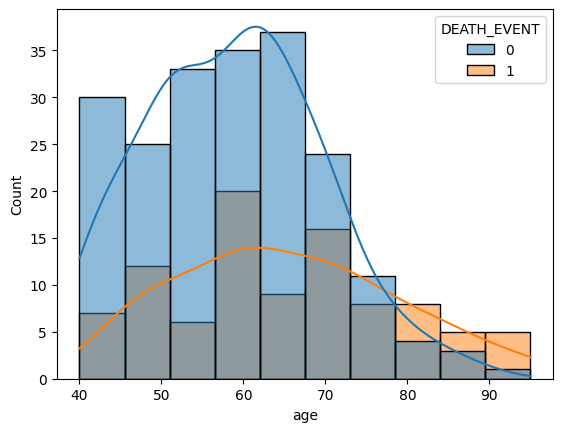

In [330]:
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True)

In [331]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

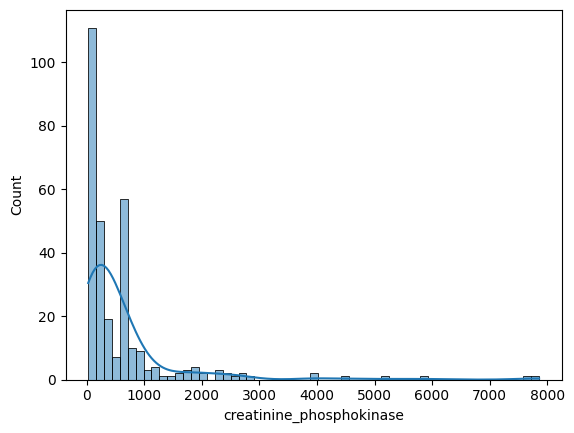

In [332]:
sns.histplot(data=df, x='creatinine_phosphokinase' , kde=True)      # 3천 이상부터는 이상치로 봐야 할것 같기도 혹은, 3천 이후부터는 분할하여 보기 

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

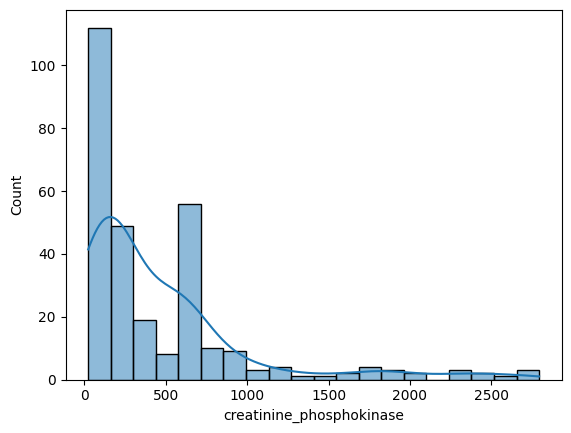

In [333]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase']<3000], x='creatinine_phosphokinase' , kde=True) 

# 3천 이상 살펴봤지만 여기서도 이상치가 발견됨.

<Axes: xlabel='ejection_fraction', ylabel='Count'>

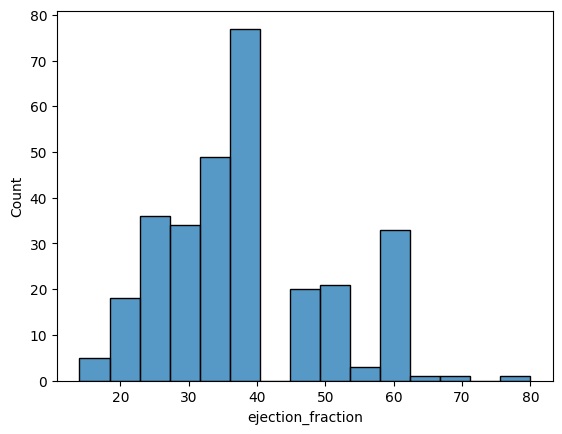

In [334]:
sns.histplot(x='ejection_fraction', data=df)

# 그래프에 보이지 않는게 있다 요건 뭐지?
# 데이터가 통으로 빠진것이 아니라 bins로 자동으로 정렬되다 보니 생긴 빈 값. 이런 경우 bins를 조정

<Axes: xlabel='ejection_fraction', ylabel='Count'>

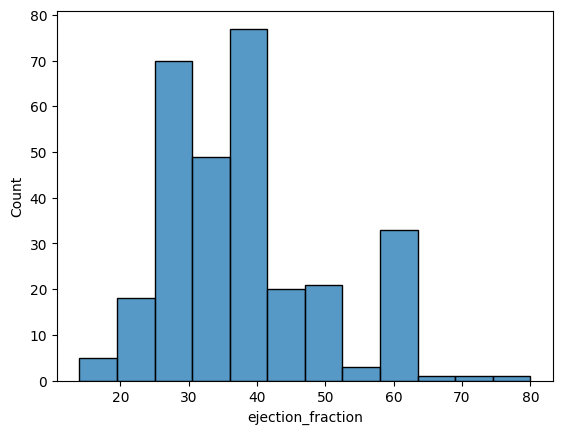

In [335]:
sns.histplot(x='ejection_fraction', data=df, bins=12) # type: ignore

<Axes: xlabel='ejection_fraction', ylabel='Count'>

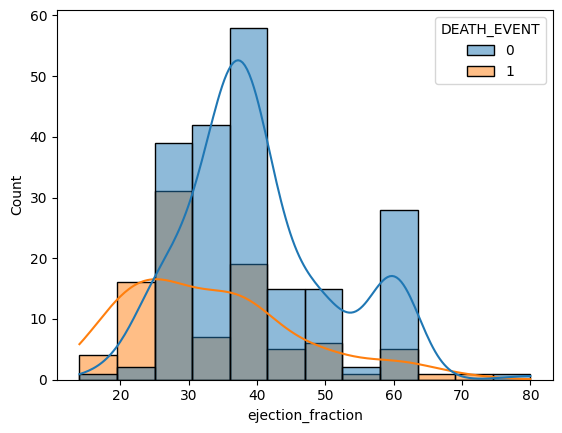

In [336]:
sns.histplot(x='ejection_fraction', data=df, bins=12, hue='DEATH_EVENT', kde=True)# type: ignore

<Axes: xlabel='platelets', ylabel='Count'>

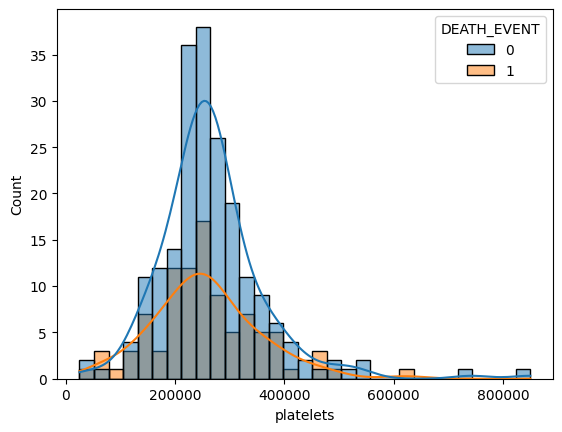

In [337]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', kde=True)

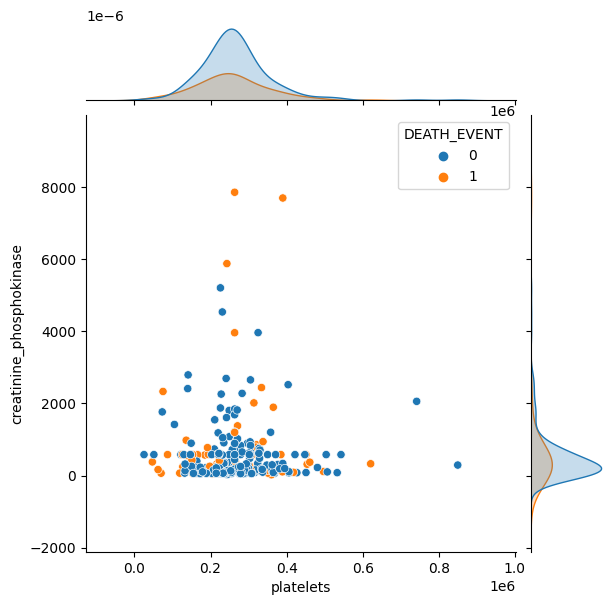

In [338]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df)

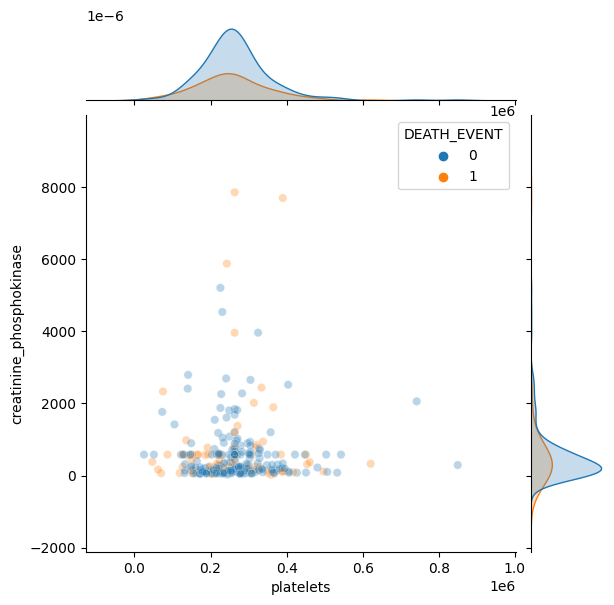

In [339]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

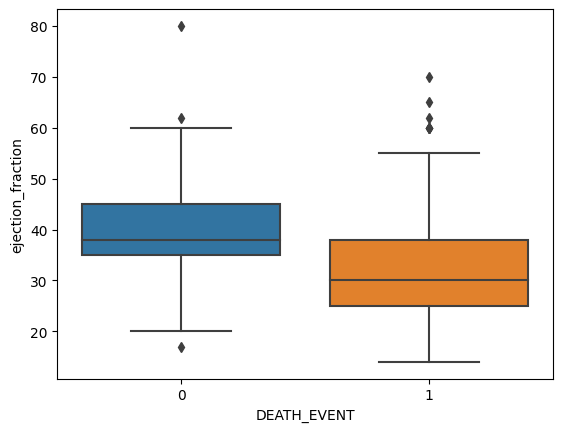

In [340]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

# 경영진에게 보고 시 보기 좋은 그래프가 좋음. 이런 상자그림

<Axes: xlabel='smoking', ylabel='ejection_fraction'>

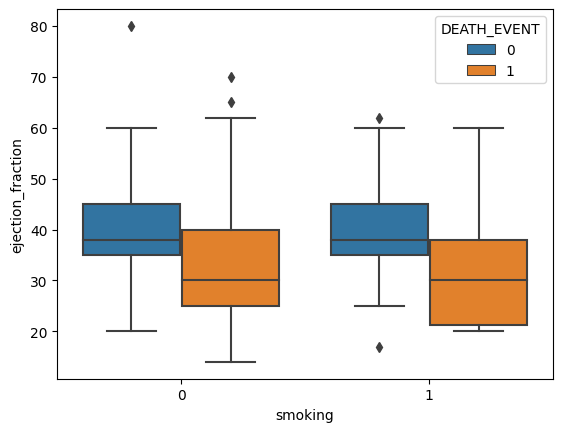

In [341]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df, hue='DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

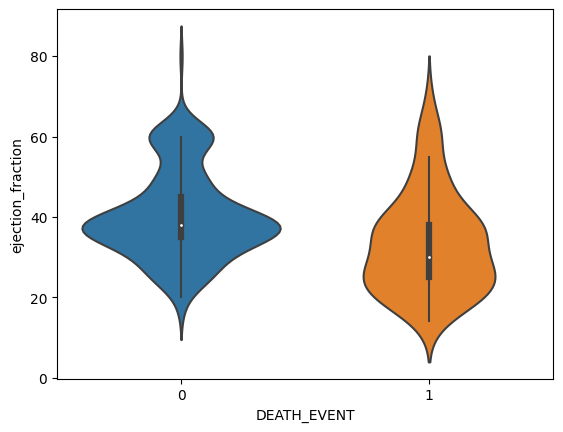

In [342]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

<Axes: xlabel='smoking', ylabel='ejection_fraction'>

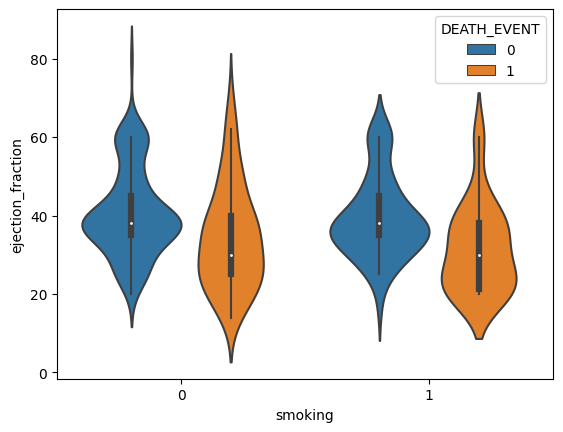

In [343]:
sns.violinplot(x='smoking', y='ejection_fraction', data=df, hue='DEATH_EVENT')

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

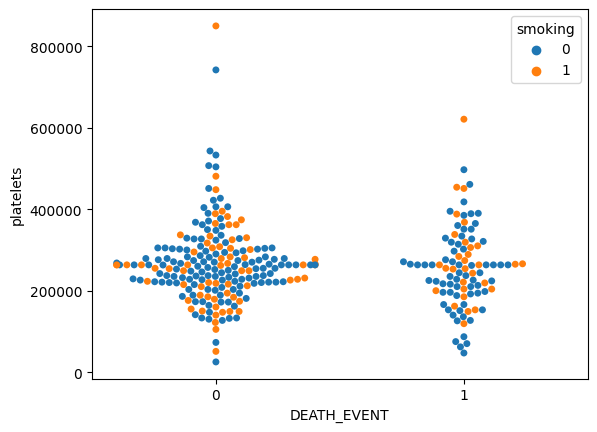

In [344]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', data=df, hue='smoking')

In [384]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='DEATH_EVENT', ylabel='time'>

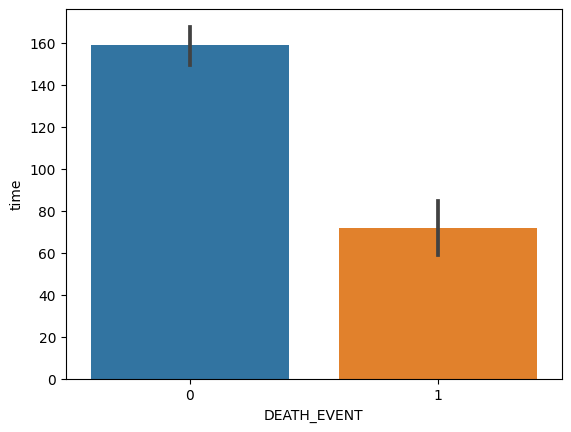

In [390]:
sns.barplot(y='time', x='DEATH_EVENT', data=df)

In [393]:
df.corr(numeric_only=True).T.style.background_gradient(cmap = "magma")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.078288,-0.104312,-0.083405,0.067953,0.094403,-0.007391,0.167693,-0.025785,0.070739,0.006841,-0.229152,0.253524
anaemia,0.078288,1.000000,-0.146068,-0.008355,0.039708,0.020081,-0.025793,0.062286,0.056153,-0.084888,-0.103218,-0.155115,0.070422
creatinine_phosphokinase,-0.104312,-0.146068,1.000000,0.026323,-0.063209,-0.051544,-0.048994,-0.073136,0.036915,0.039922,-0.072834,0.154033,-0.042158
diabetes,-0.083405,-0.008355,0.026323,1.000000,-0.020348,-0.016469,0.063281,-0.072249,-0.107381,-0.151084,-0.131494,0.027178,-0.001515
ejection_fraction,0.067953,0.039708,-0.063209,-0.020348,1.000000,0.040142,0.068854,-0.048285,0.169105,-0.132177,-0.053543,0.031173,-0.277231
high_blood_pressure,0.094403,0.020081,-0.051544,-0.016469,0.040142,1.000000,0.063633,0.002698,0.044742,-0.100492,-0.047993,-0.202940,0.071047
platelets,-0.007391,-0.025793,-0.048994,0.063281,0.068854,0.063633,1.000000,-0.039510,0.028457,-0.122131,-0.005000,-0.000483,-0.056968
serum_creatinine,0.167693,0.062286,-0.073136,-0.072249,-0.048285,0.002698,-0.039510,1.000000,-0.239547,0.037279,-0.013348,-0.138686,0.288560
serum_sodium,-0.025785,0.056153,0.036915,-0.107381,0.169105,0.044742,0.028457,-0.239547,1.000000,-0.021134,0.000820,0.099053,-0.204353
sex,0.070739,-0.084888,0.039922,-0.151084,-0.132177,-0.100492,-0.122131,0.037279,-0.021134,1.000000,0.449769,-0.003622,0.001834


### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


## Step 3. 모델 학습을 위한 데이터 전처리


In [345]:
value_threshold = 600000  # 이 값 이하로만 데이터 추출하려면 [value]을 사용
df = df[df['platelets'] <= value_threshold]
df.reset_index(drop=True, inplace=True)

df['platelets'].describe()

count       296.000000
mean     258550.847128
std       85223.023588
min       25100.000000
25%      211750.000000
50%      261000.000000
75%      302000.000000
max      543000.000000
Name: platelets, dtype: float64

In [346]:
value_threshold = 3000  # 이 값 이하로만 데이터 추출하려면 [value]을 사용
df = df[df['creatinine_phosphokinase'] <= value_threshold]
df.reset_index(drop=True, inplace=True)

df['creatinine_phosphokinase'].describe()

count     289.000000
mean      457.321799
std       533.582764
min        23.000000
25%       115.000000
50%       244.000000
75%       582.000000
max      2794.000000
Name: creatinine_phosphokinase, dtype: float64

### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [347]:
from sklearn.preprocessing import StandardScaler    # 표준화 하기 

In [348]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기. 표준화 하기 위해서 분리

# 수치형 데이터
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction',  'platelets', 'serum_creatinine', 'serum_sodium']]

# 범주형 데이터
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

# target
y = df['DEATH_EVENT']

In [349]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

#변환하면 series 형태로 출력이된다.
print(type(X_scaled))

<class 'numpy.ndarray'>


In [350]:
# 그렇기 때문에 데이터프레임으로 변환하자
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
print(type(X_scaled))
X_scaled.head()

<class 'pandas.core.frame.DataFrame'>


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.198989,0.234068,-1.527700,0.080650,0.516513,-1.484109
1,0.347130,-0.584468,-1.527700,-1.122307,-0.084140,-1.710685
2,-0.930659,-0.650176,-1.527700,-0.561706,0.516513,0.101920
3,0.347130,-0.558184,-1.527700,0.804760,1.317383,-4.656168
4,2.476778,-0.770328,0.164864,-0.631781,0.716731,-1.030958


In [351]:
# 표준화가 끝난 X_scaled와 범주형 자료인 X_cat을 합치자
X = pd.concat([X_scaled, X_cat], axis=1)
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.198989,0.234068,-1.527700,0.080650,0.516513,-1.484109,0,0,1,1,0
1,0.347130,-0.584468,-1.527700,-1.122307,-0.084140,-1.710685,0,0,0,1,1
2,-0.930659,-0.650176,-1.527700,-0.561706,0.516513,0.101920,1,0,0,1,0
3,0.347130,-0.558184,-1.527700,0.804760,1.317383,-4.656168,1,1,0,0,0
4,2.476778,-0.770328,0.164864,-0.631781,0.716731,-1.030958,1,0,1,1,1


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

In [354]:
from sklearn.tree import DecisionTreeClassifier

dtc_gini = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth=40)
dtc_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, random_state=1)

In [355]:
from sklearn.tree import DecisionTreeClassifier

dtc_entropy = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=40)
dtc_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, random_state=1)

In [356]:
from sklearn.metrics import classification_report

In [357]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred_gini = dtc_gini.predict(X_test)

# 실제 테스트값, 모델의 예측값
print(classification_report(y_test, pred_gini))



              precision    recall  f1-score   support

           0       0.72      0.77      0.75        57
           1       0.50      0.43      0.46        30

    accuracy                           0.66        87
   macro avg       0.61      0.60      0.61        87
weighted avg       0.64      0.66      0.65        87



In [358]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred_entropy = dtc_entropy.predict(X_test)

# 실제 테스트값, 모델의 예측값
print(classification_report(y_test, pred_entropy))



              precision    recall  f1-score   support

           0       0.71      0.68      0.70        57
           1       0.44      0.47      0.45        30

    accuracy                           0.61        87
   macro avg       0.57      0.58      0.57        87
weighted avg       0.62      0.61      0.61        87



In [359]:
from sklearn.metrics import accuracy_score

def dtc_tuning(criterion, max_depth):

    pred_result = []
    for d in range(1,max_depth):
        dtc = DecisionTreeClassifier(criterion=criterion, max_depth=d, random_state=1)
        dtc.fit(X_train, y_train)
        y_test_pred = dtc.predict(X_test)
        pred_result.append(accuracy_score(y_test, y_test_pred))

    return pred_result

max_depth = 4
gini_acc = dtc_tuning('gini', max_depth)
entropy_acc = dtc_tuning('entropy', max_depth)

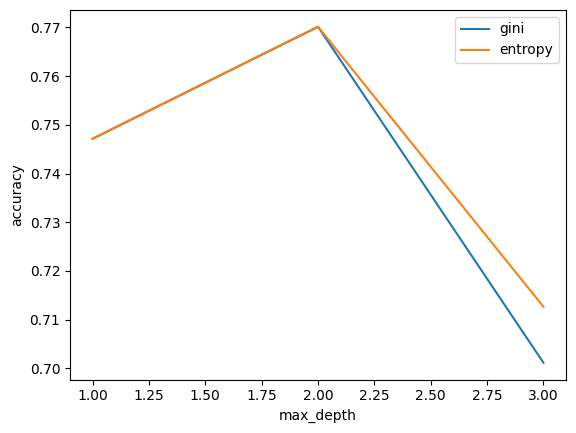

In [360]:
#criterion, max_depth에 따른 정확도 시각화
plt.plot(range(1,max_depth), gini_acc, label='gini')
plt.plot(range(1,max_depth), entropy_acc, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [361]:
from sklearn import svm
model = svm.SVC(gamma='auto', C=5)

model.fit(X_train, y_train) # 모델 학습

SVC(C=5, gamma='auto')

## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [362]:
from sklearn.linear_model import LogisticRegression

In [363]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()
# 학습시 부족 현상에는 max_iter = int 값 주기 즉, 깊이 주기 

model_lr.fit(X_train, y_train)



LogisticRegression()

### 문제 10. 모델 학습 결과 평가하기


In [364]:
from sklearn.metrics import classification_report

In [365]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)

# 실제 테스트값, 모델의 예측값
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.72      0.91      0.81        57
           1       0.67      0.33      0.44        30

    accuracy                           0.71        87
   macro avg       0.69      0.62      0.63        87
weighted avg       0.70      0.71      0.68        87



### 문제 11. XGBoost 모델 생성/학습하기


In [366]:
from xgboost import XGBClassifier

In [367]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 문제 12. 모델 학습 결과 평가하기


In [368]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

# 실제 테스트값, 모델의 예측값
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        57
           1       0.67      0.60      0.63        30

    accuracy                           0.76        87
   macro avg       0.73      0.72      0.73        87
weighted avg       0.75      0.76      0.76        87



### 문제 13. 특징의 중요도 확인하기


In [369]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
# 모델의 큰 중요도가 있던걸 시각적으로 보여주기 

model_xgb.feature_importances_

array([0.14113575, 0.09563918, 0.18019336, 0.06602101, 0.15192443,
       0.09233228, 0.02937543, 0.05432465, 0.05727664, 0.0677067 ,
       0.06407059], dtype=float32)

In [370]:
# 시간 포함

# plt.plot(model_xgb.feature_importances_)    
# 6번째 인덱스가 중요도가 높은 모습. columns명으로는 Time. 
# 우리의 목표는 살았는지 죽었는지에 대해 알아보는 것.
# 시간이 생존여부에 큰 중요도를 끼치게 된다. 
# 몸이 망가진 상태에서 병원에 오면 담배, 성별, 고혈합 등등의 중요도는 상대적으로 떨어질 가능성이 있다.


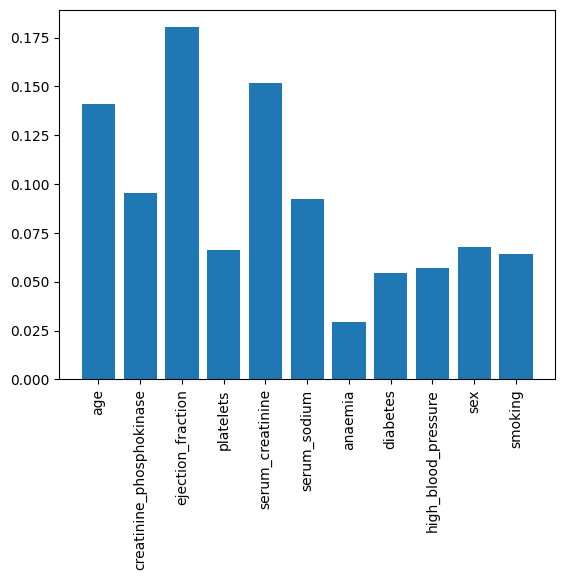

In [371]:
# time을 삭제하고 난 후의 시각화.
# time 컬럼 안에는 이미 DEATH_EVENT 결과가 강하게 영향을 미치기 때문에 제외하고 실행을 하게되었다.

plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [372]:
dtc_entropy.feature_importances_

array([0.2218404 , 0.15694158, 0.10222533, 0.1727455 , 0.16977652,
       0.1003271 , 0.01543294, 0.01543294, 0.        , 0.04527769,
       0.        ])

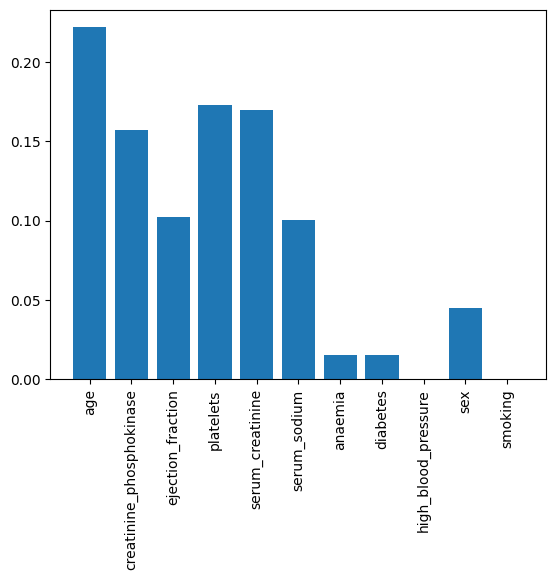

In [373]:
plt.bar(X.columns, dtc_entropy.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [374]:
dtc_gini.feature_importances_

array([0.23469012, 0.16732475, 0.13289935, 0.16449515, 0.20915152,
       0.03914274, 0.01252568, 0.        , 0.0241136 , 0.01565709,
       0.        ])

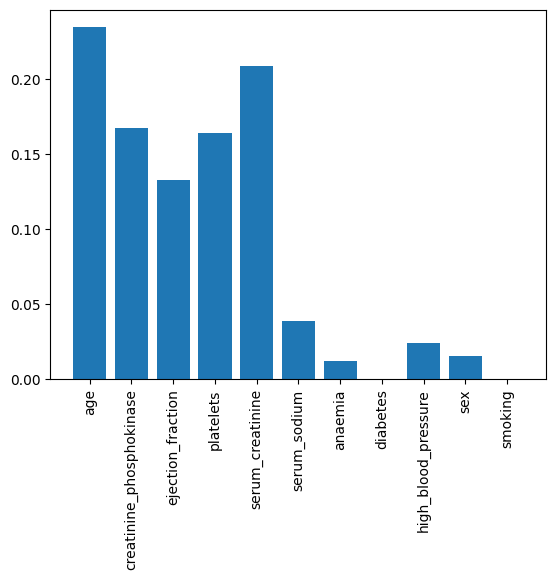

In [375]:
plt.bar(X.columns, dtc_gini.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step5 모델 학습 결과 심화 분석하기


### recall  
recall의 뜻. positive를 맞춘 비율. 정답임에더 불순물이 많음에도 불구하고, 실제 정답을 얼마나 포함하고 있는가에 대해서만 괌심이 있음. 즉,  불순물이 많아도 실제 정답이 얼마나 많이 있는지를 평가함. 


민감도
실제 Positive한 것 중에서 얼마나 잘 예측하였는지 비율


### precision  
precision뜻: 인공지능이 Positive라고 말한 것 중 정답을 맞춘 경우. 즉. 정답이 얼마나 있던 정확하게 골라낸것.
정답이 5천게 있어도 정답인 답을 2개만 내놓아도 괜찮음. 즉, 불순물이 있으면 안됨. 오직 정답만이 있어야함. 

정밀도
Positive라고 예측한 것 중에서 얼마나 잘 맞았는지 비율


### 문제 14. Precision-Recall 커브 확인하기

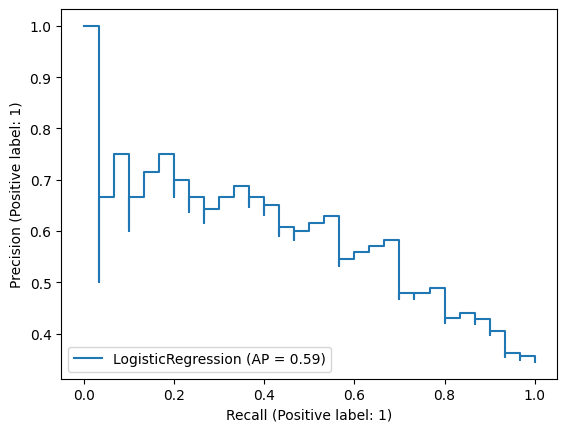

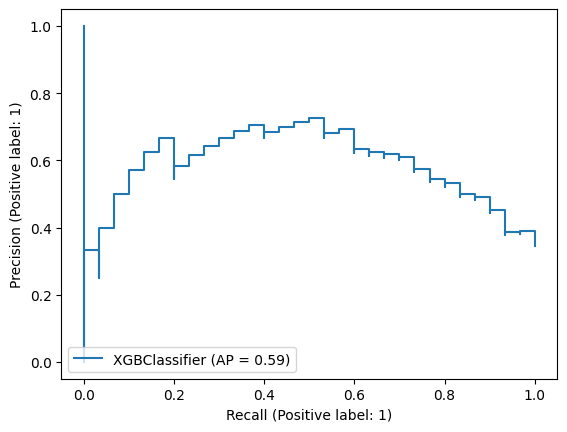

In [376]:
# plot_precision_recall_curve가 1.2부터 삭제가 됨.

from sklearn.metrics import PrecisionRecallDisplay

# recall과 precision의 비교

PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test)

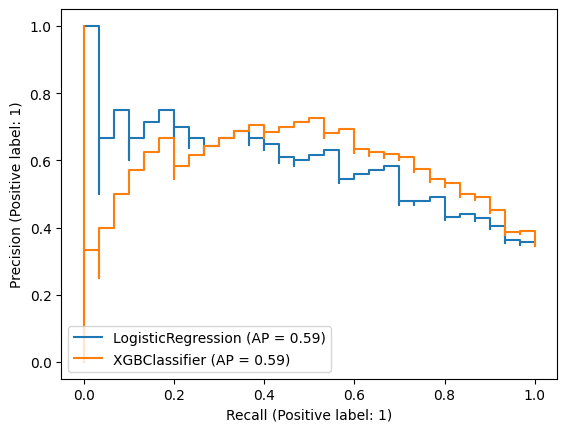

In [377]:
fig = plt.figure()
ax = fig.gca()
PrecisionRecallDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
PrecisionRecallDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)

In [378]:
import sklearn
print(sklearn.__version__)

1.3.0


### 문제 15. ROC 커브 확인하기

In [379]:
from sklearn.metrics import RocCurveDisplay

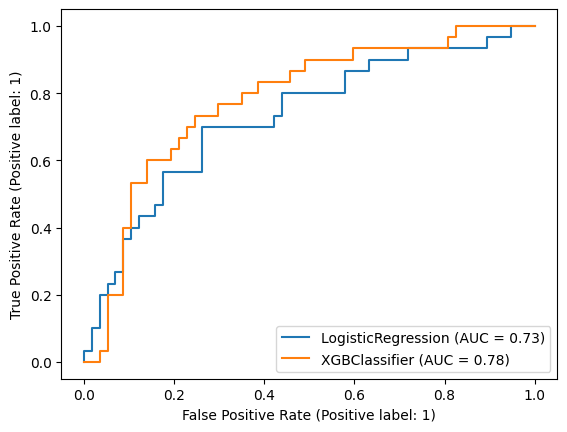

In [380]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)

fig = plt.figure()
ax = fig.gca()

RocCurveDisplay.from_estimator(model_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)
